In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from reggae.utilities import save, load, is_cuda
from reggae.gp.variational.models import MultiLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.data_loaders.datasets import ArtificialData
from reggae.plot.variational_plotters import Plotter
from reggae.gp.variational.options import VariationalOptions


In [2]:
dataset = ArtificialData()

num_genes = dataset.num_genes
num_tfs = dataset.num_tfs
gene_names = np.arange(num_genes)
t_inducing = torch.linspace(0, 1, 7, dtype=torch.float64).reshape((-1, 1))
t_observed = dataset.t.view(-1)
print('Inducing points', t_inducing.shape)
print(gene_names.shape)



Inducing points torch.Size([7, 1])
(20,)


In [3]:
options = VariationalOptions(
    learn_inducing=False,
    num_samples=50,
    kernel_scale=False,
)

model = MultiLFM(num_genes, num_tfs, t_inducing, dataset, options)
model = model.cuda() if is_cuda() else model

optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = TranscriptionalTrainer(model, optimizer, dataset)
plotter = Plotter(model, gene_names)

print(t_observed.shape, dataset[0][1].shape)

torch.Size([10]) torch.Size([10])


C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=options.learn_inducing)
C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models\model.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.initial_conditions = Parameter(torch.tensor(torch.zeros(self.num_outputs, 1)), requires_grad=True)


### Outputs prior to training:

torch.Size([1, 20, 10])


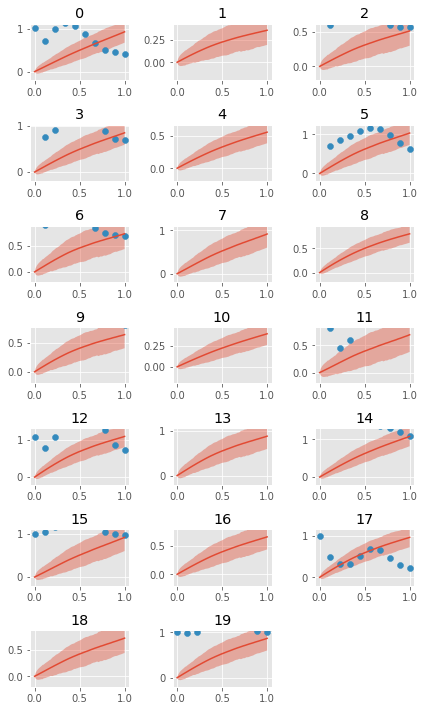

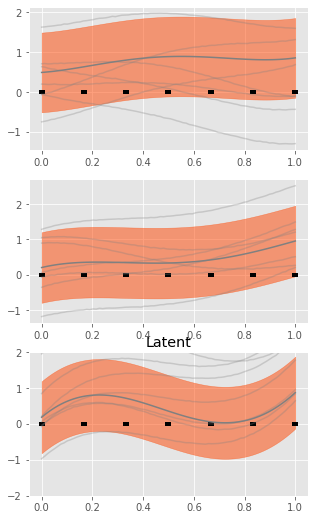

In [4]:
t_predict = torch.linspace(0, 1, 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol
}
print(dataset.m_observed.shape)
plotter.plot_outputs(t_predict, t_scatter=t_observed, y_scatter=dataset.m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict)

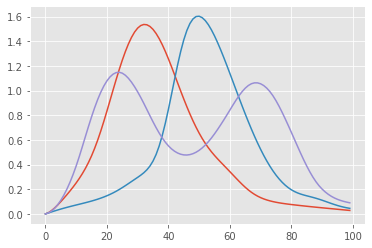

In [5]:
for i in range(num_tfs):
    plt.plot(dataset.f_observed[i])

In [ ]:
import time
start = time.time()
tol = 5e-4
output = trainer.train(100, rtol=tol, atol=tol/10, report_interval=1, plot_interval=2)
end = time.time()
print(end - start)



### Outputs after training

Epoch 31/130 - Loss: -9.24 (-139.58 130.34) λ: 0.039 b: -0.04 d 1.34 s: 0.81
Epoch 32/130 - Loss: -11.61 (-139.61 128.00) λ: 0.037 b: -0.08 d 1.32 s: 0.85
Epoch 33/130 - Loss: -21.83 (-147.84 126.00) λ: 0.035 b: -0.12 d 1.35 s: 0.83
Epoch 34/130 - Loss: -28.63 (-152.88 124.25) λ: 0.033 b: -0.07 d 1.33 s: 0.89
Epoch 35/130 - Loss: -23.21 (-145.88 122.67) λ: 0.031 b: -0.13 d 1.39 s: 0.85
Epoch 36/130 - Loss: -30.85 (-152.09 121.24) λ: 0.030 b: -0.11 d 1.42 s: 0.85
Epoch 37/130 - Loss: -38.89 (-158.81 119.92) λ: 0.029 b: -0.05 d 1.39 s: 0.91
Epoch 38/130 - Loss: -30.31 (-149.01 118.69) λ: 0.028 b: -0.10 d 1.42 s: 0.91
Epoch 39/130 - Loss: -36.01 (-153.56 117.55) λ: 0.027 b: -0.07 d 1.41 s: 0.95
Epoch 40/130 - Loss: -38.45 (-154.92 116.47) λ: 0.026 b: -0.05 d 1.38 s: 1.01
Epoch 41/130 - Loss: -42.48 (-157.93 115.45) λ: 0.025 b: -0.11 d 1.43 s: 1.00
Epoch 42/130 - Loss: -43.59 (-158.06 114.47) λ: 0.025 b: -0.11 d 1.46 s: 1.01
Epoch 43/130 - Loss: -51.58 (-165.12 113.54) λ: 0.024 b: -0.06 d 

In [ ]:
plotter.plot_losses(trainer, last_x=100)
plotter.plot_outputs(t_predict, t_scatter=t_observed, y_scatter=dataset.m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 9))

In [ ]:
save(model, 'multitf')

